Stimulation devices
===================

To stimulate one class of retinal photoreceptor without changing the activation in others&mdash;which is to perform the method of silent substitution&mdash;requires a multiprimary stimulation device with at least as many primaries as there are photoreceptors in the retina. This generally means that [5 primaries are needed](./01_background.rst), although 4 primaries may suffice when working in the photopic range as rod photoreceptors become saturated and incapable of signalling above 300 cd/m$^2$ ([Aguiller and Stiles, 1954](https://doi.org/10.1080/713818657); [Adelson, 1982](https://doi.org/10.1016/0042-6989(82)90143-2); but see [Shapiro, 2002](https://iovs.arvojournals.org/article.aspx?articleid=2200107); [Kremers et al., 2009](https://doi.org/10.1007/s10633-008-9159-0)). The primaries should be independantly addressable, additive, and ideally stable over time with a linear gamma function. Peak wavelength and bandwidth are key considerations that will ultimately define the gamut and available contrast ([Evéquoz et al., 2021](https://doi.org/10.1364/josaa.420373)), and the light source will also need to be integrated into an optical setup for stimulus delivery&mdash;usually either a Ganzfeld (e.g., [Martin et al., 2021](https://doi.org/10.3758/s13428-021-01759-3)) or Maxwellian (e.g., [Cao et al., 2015](https://doi.org/10.1167/15.1.27)).

[Conus and Geiser (2020)](https://doi.org/10.3390/photonics7040121) reviewed stimulation devices from a range of silent substitution studies and found that in most cases the device had 4 or 5 primaries and was built from scratch using LEDs, optical bench components, and microprocessors, such as Arduino, for pulse width modulation control of intensity. Only a few devices were commercially bought. Whatever the device and setup, it will be necessary to have a forward calibration model that is representative of what an observer sees, and which can be used to predict spectral output for any combination of settings. Typically this involves sampling each of the primaries at a range of itentsities with an external spectrometer and using interpolation methods. 


`pysilsub.device.StimulationDevice`
-----------------------------------

*PySilSub* has a generic `StimulationDevice` class that will turn spectral calibration data for any multiprimary system into a predictive model. To get started, you will need a calibration file containing spectral measurements. Each row should be a spectral measurement for a device primary at a given setting, and there should be column labels 'Primary' and 'Setting' to indicate this. Note that it will be important to include a dark measurement where LEDs are turned off (i.e., Setting = 0) to account for ambient light in an experimental setup. If you have a [JETI](https://www.jeti.com/) or [OceanOptics](https://www.oceaninsight.com/) spectrometer, *[PyPlr](https://github.com/PyPlr/cvd_pupillometry)* has some Python interfaces that may help you obtain the spectral measurements.

The following demonstration uses calibration data from a linear 5-primary device with 8-bit resolution depth, which is to say that the intensity of each LED is set with a number between 0 and 255. The full range of intensities was sampled in steps of 8, so there are 33 measurements for each LED. 

The first row of the calibration file contains the wavelengths of the spectral measurements as well as columns to identify the primary and setting. 

In [1]:
import pandas as pd

data = pd.read_csv(
    '../../data/BCGAR_5_Primary_8_bit_linear.csv', 
    index_col=['Primary', 'Setting']
)
data.columns = data.columns.astype('int64')
data.columns.name = 'Wavelength'
data

Wavelength            380       381       382       383       384       385  \
Primary Setting                                                               
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        7        0.000068  0.000071  0.000062  0.000068  0.000055  0.000055   
        15       0.000137  0.000141  0.000123  0.000136  0.000109  0.000111   
        23       0.000205  0.000212  0.000185  0.000204  0.000164  0.000166   
        31       0.000274  0.000282  0.000247  0.000272  0.000219  0.000222   
...                   ...       ...       ...       ...       ...       ...   
4       223      0.003027  0.003555  0.003159  0.003563  0.002712  0.002951   
        231      0.003135  0.003682  0.003271  0.003690  0.002808  0.003056   
        239      0.003243  0.003809  0.003384  0.003817  0.002905  0.003162   
        247      0.003351  0.003936  0.003497  0.003944  0.003002  0.003267   
        255      0.003459  0.004063  0.003610  0.004071  0.003099  0.003373   

Wavelength            386       387       388       389  ...       771  \
Primary Setting                                          ...             
0       0        0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        7        0.000064  0.000051  0.000063  0.000074  ...  0.000037   
        15       0.000127  0.000101  0.000126  0.000148  ...  0.000074   
        23       0.000191  0.000152  0.000189  0.000222  ...  0.000111   
        31       0.000254  0.000202  0.000252  0.000296  ...  0.000148   
...                   ...       ...       ...       ...  ...       ...   
4       223      0.002827  0.002159  0.003197  0.003623  ...  0.001990   
        231      0.002928  0.002237  0.003311  0.003753  ...  0.002061   
        239      0.003029  0.002314  0.003426  0.003882  ...  0.002132   
        247      0.003130  0.002391  0.003540  0.004011  ...  0.002203   
        255      0.003231  0.002468  0.003654  0.004141  ...  0.002274   

Wavelength            772       773       774       775       776       777  \
Primary Setting                                                               
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        7        0.000039  0.000040  0.000039  0.000039  0.000039  0.000036   
        15       0.000077  0.000080  0.000079  0.000078  0.000078  0.000072   
        23       0.000116  0.000120  0.000118  0.000117  0.000117  0.000108   
        31       0.000154  0.000160  0.000158  0.000157  0.000156  0.000144   
...                   ...       ...       ...       ...       ...       ...   
4       223      0.002227  0.002264  0.002182  0.002558  0.002361  0.002268   
        231      0.002306  0.002345  0.002259  0.002649  0.002446  0.002349   
        239      0.002386  0.002426  0.002337  0.002741  0.002530  0.002430   
        247      0.002465  0.002507  0.002415  0.002832  0.002614  0.002511   
        255      0.002545  0.002587  0.002493  0.002923  0.002699  0.002592   

Wavelength            778       779       780  
Primary Setting                                
0       0        0.000000  0.000000  0.000000  
        7        0.000032  0.000038  0.000037  
        15       0.000064  0.000075  0.000075  
        23       0.000096  0.000113  0.000112  
        31       0.000128  0.000151  0.000149  
...                   ...       ...       ...  
4       223      0.001905  0.002162  0.002360  
        231      0.001973  0.002239  0.002445  
        239      0.002041  0.002316  0.002529  
        247      0.002109  0.002394  0.002613  
        255      0.002177  0.002471  0.002698  

[165 rows x 401 columns]

After reading the CSV file into a `DataFrame` using pandas, we can pass the data to `StimulationDevice` along with some further information to gain access to many useful features.

In [2]:
from pysilsub.device import StimulationDevice

device = StimulationDevice(
    resolutions=[255]*5,
    colors=['blue', 'cyan', 'green', 'orange', 'red'],
    spds=data,
    spd_binwidth=1,
    name='BCGAR (8-bit, linear)'
)

For example, plot the spectral power distributions of all measurements.

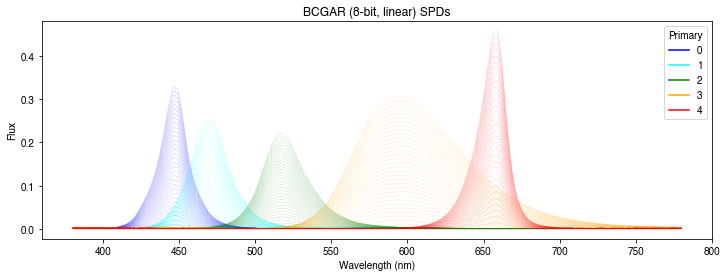

In [3]:
spd_fig = device.plot_spds()

Or the gamut of the device, showing the boundaries of the colour space that can be achieved on the [CIE *xy* chromaticity horseshoe](https://en.wikipedia.org/wiki/CIE_1931_color_space).

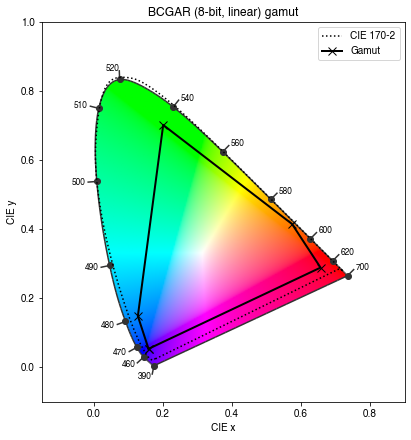

In [4]:
gamut_fig = device.plot_gamut()

More useful, we can use `device.predict_primary_spd(...)` to predict the spectral output of the stimulation device for a chosen primary at a given setting. This method simply interpolates between the measured spectra that were provided in the calibration data. It is a workhorse method that gets called repeatedly.

Wavelength
380    0.001115
381    0.001191
382    0.001198
383    0.001231
384    0.001003
         ...   
776    0.000710
777    0.000693
778    0.000562
779    0.000733
780    0.000826
Name: Primary 2 (half power), Length: 401, dtype: float64


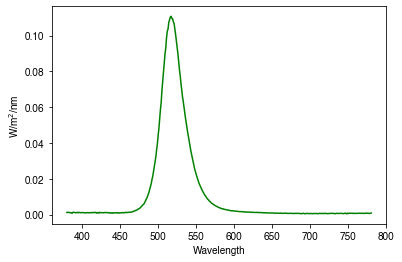

In [5]:
primary_spd = device.predict_primary_spd(
    primary=2, 
    setting=.5,  # Could also say 128
    name='Primary 2 (half power)'
)
print(primary_spd)
primary_spd.plot(ylabel='W/m$^2$/nm', c=device.colors[2]);

We can also use `device.predict_multiprimary_spd(...)` to predict the spectral output for a combination of primaries and settings. This method calls the previous method for each primary/setting pair and sums the spectral power distributions.

Predicted output for device settings: [0.5, 0.5, 0.5, 0.5, 0.5]


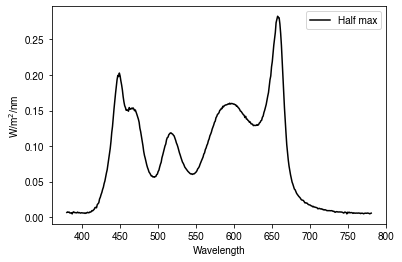

In [6]:
half_max = [.5, .5, .5, .5, .5]  # Same as [128, 128, 128, 128, 128]
device_spd = device.predict_multiprimary_spd(half_max, 'Half max')
device_spd.plot(legend=True, ylabel='W/m$^2$/nm', color='k')
print(f'Predicted output for device settings: {half_max}')

`device.predict_multiprimary_aopic(...)` will return the photoreceptor-specific irradiances for a spectrum produced by any combination of settings. This method calls the previous method and then weights the spectrum by the photoreceptor spectral sensitivities, before summing up the values for each photoreceptor.

Photoreceptor
S     6.397388
M    10.396477
L    13.764289
R     9.699696
I     9.035714
Name: Half max, dtype: float64

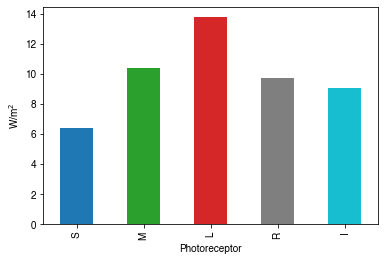

In [7]:
device_ao = device.predict_multiprimary_aopic(half_max, 'Half max')
ao_colors = list(device.aopic_colors.values())
device_ao.plot(kind='bar', color=ao_colors, ylabel='W/m$^2$')
device_ao

We can also search for a spectrum based on *xy* chromaticity and luminance.

basinhopping step 0: f 1.11019e-11
basinhopping step 1: f 5.7635e-08 trial_f 5.7635e-08 accepted 1  lowest_f 1.11019e-11
Requested LMS: [ 0.87374046  0.78105394  0.44556496]
Solution LMS: [ 0.87373816  0.78105248  0.44556688]


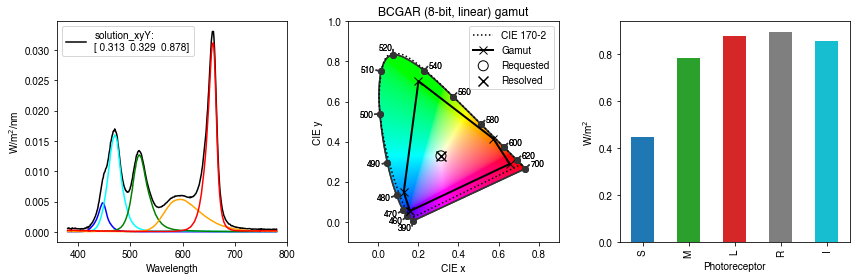

In [8]:
target_xy=[0.31271, 0.32902]
target_luminance=600.
bg = device.find_settings_xyY(target_xy, target_luminance)

To summarise, `StimulationDevice` will turn the calibration data for your stimulation system into a predicitve model, which is a big step towards silent substitution. Incidentally, `StimulationDevice` is the base class for `SilentSubstitutionProblem` (described [here](./03b_making_stimuli.ipynb)), which uses numerical optimisation and linear algebra procedures to find solutions to stimulus problems. 